In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 195MB/s]
100% 1.06G/1.06G [00:05<00:00, 191MB/s]


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.5788 - loss: 1.5396 - val_accuracy: 0.6624 - val_loss: 0.6262
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 86ms/step - accuracy: 0.7057 - loss: 0.5888 - val_accuracy: 0.7328 - val_loss: 0.5310
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7675 - loss: 0.4842 - val_accuracy: 0.7410 - val_loss: 0.5321
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8158 - loss: 0.4092 - val_accuracy: 0.6418 - val_loss: 0.6604
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 83ms/step - accuracy: 0.8376 - loss: 0.3640 - val_accuracy: 0.7896 - val_loss: 0.4749
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.8804 - loss: 0.2859 - val_accuracy: 0.8084 - val_loss: 0.4443
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9224 - loss: 0.1969 - val_accuracy: 0.8114 - val_loss: 0.5397
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.9505 - loss: 0.1272 - 

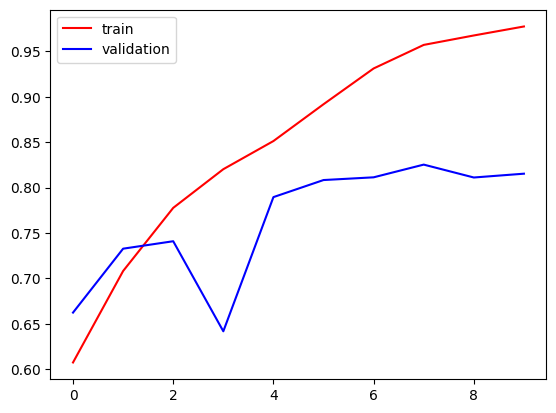

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

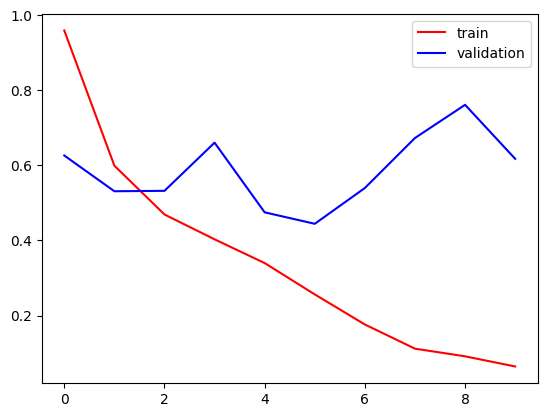

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img1 = cv2.imread('/content/CAT1.jpg')
test_img2 = cv2.imread('/content/CAT3.jpg')
test_img3 = cv2.imread('/content/CAT4.jpg')
test_img4 = cv2.imread('/content/DOG & CAT 2.jpg')
test_img5 = cv2.imread('/content/DOG2.jpg')
test_img6 = cv2.imread('/content/DOG3.jpg')
test_img7 = cv2.imread('/content/DOG4.jpg')
test_img9 = cv2.imread('/content/DOG3.jpg')
test_img10 =cv2.imread('/content/3cat1dog.jpg')

In [ ]:
# Create an empty list to store the image data
#image = []

# List of image paths
image_paths = ['/content/CAT1.jpg', '/content/CAT3.jpg', '/content/CAT4.jpg',
               '/content/DOGCAT2.jpg', '/content/DOG2.jpg', '/content/DOG3.jpg',
               '/content/DOG4.jpg', '/content/DOG3.jpg']

# Read each image and append it to the list
for path in image_paths:
    img = cv2.imread(path)
    image.append(img)

# Now 'images' is a list containing the image data

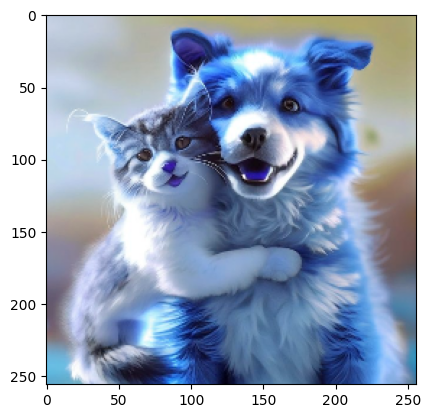

In [ ]:
plt.imshow(test_img4)

In [ ]:
test_img4.shape

(256, 256, 3)

In [ ]:
images = cv2.resize(test_img4,(256,256))

array([[[193, 205, 223],
        [192, 204, 222],
        [192, 204, 222],
        ...,
        [171, 166, 117],
        [172, 167, 118],
        [171, 167, 118]],

       [[194, 206, 224],
        [194, 206, 224],
        [193, 205, 223],
        ...,
        [171, 166, 117],
        [173, 168, 119],
        [172, 168, 119]],

       [[195, 208, 226],
        [195, 207, 225],
        [195, 206, 224],
        ...,
        [172, 167, 118],
        [173, 168, 119],
        [175, 170, 120]],

       ...,

       [[ 96, 171, 208],
        [ 96, 171, 208],
        [ 96, 170, 207],
        ...,
        [ 89, 128, 158],
        [ 82, 124, 156],
        [ 70, 120, 156]],

       [[ 97, 171, 207],
        [ 94, 168, 204],
        [ 95, 169, 205],
        ...,
        [ 88, 125, 154],
        [ 82, 121, 153],
        [ 71, 118, 152]],

       [[ 95, 168, 206],
        [ 95, 168, 206],
        [ 95, 168, 206],
        ...,
        [ 88, 125, 155],
        [ 82, 121, 154],
        [ 73, 118, 152]]], dtype=uint8)
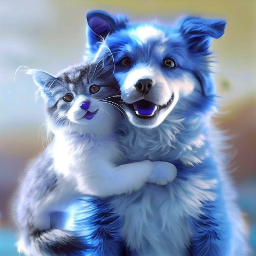

In [ ]:
images

In [ ]:
images = images.reshape((1,256,256,3))

In [ ]:
model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

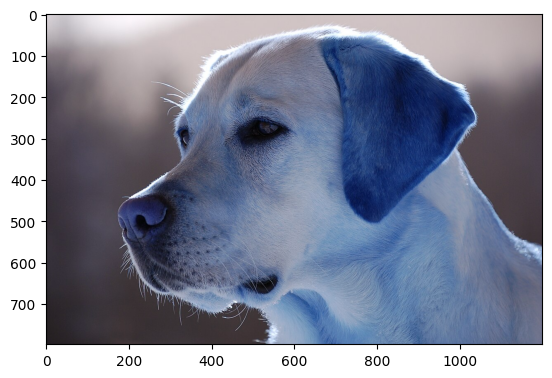

In [ ]:
plt.imshow(test_img6)

In [ ]:
images1 = cv2.resize(test_img6,(256,256))

array([[[217, 211, 216],
        [216, 210, 215],
        [215, 209, 214],
        ...,
        [176, 163, 161],
        [175, 161, 162],
        [174, 160, 161]],

       [[217, 211, 216],
        [216, 210, 215],
        [214, 208, 213],
        ...,
        [176, 163, 161],
        [175, 161, 162],
        [174, 160, 161]],

       [[216, 210, 215],
        [214, 208, 213],
        [213, 207, 212],
        ...,
        [176, 163, 161],
        [175, 161, 162],
        [175, 161, 162]],

       ...,

       [[ 35,  29,  34],
        [ 36,  30,  35],
        [ 37,  31,  36],
        ...,
        [111, 116, 144],
        [111, 115, 143],
        [113, 116, 144]],

       [[ 37,  31,  36],
        [ 38,  32,  37],
        [ 38,  32,  37],
        ...,
        [112, 116, 144],
        [110, 114, 142],
        [109, 112, 140]],

       [[ 36,  30,  35],
        [ 36,  30,  35],
        [ 37,  31,  36],
        ...,
        [109, 114, 142],
        [113, 117, 145],
        [110, 113, 141]]], dtype=uint8)
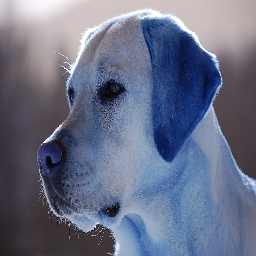

In [ ]:
images1

In [ ]:
images1 = images.reshape((1,256,256,3))

In [ ]:
model.predict(images1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1.]], dtype=float32)

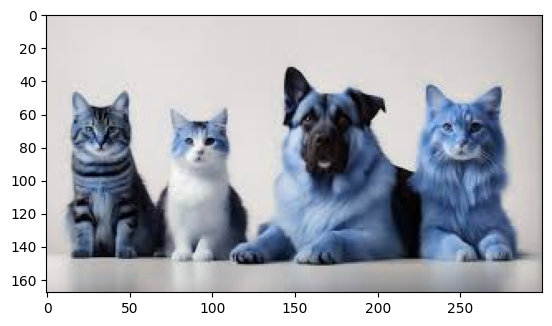

In [ ]:
plt.imshow(test_img10)

In [ ]:
images2 = cv2.resize(test_img10,(256,256))

array([[[220, 215, 212],
        [220, 215, 212],
        [220, 215, 212],
        ...,
        [175, 170, 167],
        [171, 166, 163],
        [167, 162, 159]],

       [[220, 215, 212],
        [220, 215, 212],
        [220, 215, 212],
        ...,
        [175, 170, 167],
        [171, 166, 163],
        [167, 162, 159]],

       [[220, 215, 212],
        [220, 215, 212],
        [220, 215, 212],
        ...,
        [175, 170, 167],
        [171, 166, 163],
        [167, 162, 159]],

       ...,

       [[217, 212, 211],
        [216, 211, 210],
        [216, 211, 210],
        ...,
        [178, 173, 172],
        [174, 169, 168],
        [170, 164, 163]],

       [[216, 211, 210],
        [216, 211, 210],
        [215, 210, 209],
        ...,
        [177, 172, 171],
        [173, 168, 167],
        [169, 164, 163]],

       [[216, 211, 210],
        [216, 211, 210],
        [215, 210, 209],
        ...,
        [177, 172, 171],
        [173, 168, 167],
        [168, 163, 162]]], dtype=uint8)
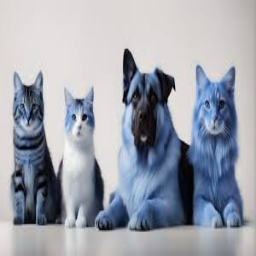

In [ ]:
images2

In [ ]:
images2 = images.reshape((1,256,256,3))

In [ ]:
model.predict(images2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)